<a href="https://colab.research.google.com/github/DunkLiao/PyCrawlerMarathon/blob/master/ReadSchoolLoanData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 政府開放平台學貸資料
#### 連結
[金融聯合徵信中心個人學生貸款狀況統計趨勢資料](https://data.gov.tw/dataset/54478)

[留學貸款承貸銀行一覽表](https://data.gov.tw/dataset/41955)

[高中職以上學校學生就學貸款統計](https://data.gov.tw/dataset/28387)

[各年度留學貸款申貸人數](https://data.gov.tw/dataset/46729)


In [ ]:
#@title
# 先下載台北黑體字型
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 將 font-family 設為 Taipei Sans TC Beta
# 設定完後，之後的圖表都可以顯示中文了
matplotlib.rc('font', family='Taipei Sans TC Beta')

### 金融聯合徵信中心個人學生貸款狀況統計趨勢資料 ###

In [9]:
#@title

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime
df = pd.read_csv("https://www.jcic.org.tw/jcweb/en/services/inquiry/public/files/Stut_Amt.CSV")
df

,年,月,個人學貸總人數,個人學貸總金額[仟元],個人學貸平均金額[仟元],個人學貸金額第25百分位數[仟元],個人學貸金額第50百分位數[仟元],個人學貸金額第75百分位數[仟元]
0,2012,1,934447,183577345,196.456,67,156,288
1,2012,2,927725,181763054,195.923,66,156,287
2,2012,3,922526,180349680,195.495,66,156,287
3,2012,4,923109,184939834,200.345,71,160,293
4,2012,5,921163,188860919,205.024,77,165,299
...,...,...,...,...,...,...,...,...
122,2022,3,800464,161697468,202.005,77,168,286
123,2022,4,799147,164750330,206.158,84,172,291
124,2022,5,795797,166231605,208.887,89,175,294
125,2022,6,784660,163822316,208.781,89,174,293


In [15]:
#@title
# 逐年統計資料

dfByYear = (df.groupby('年').sum())/12.0
dfByYear["個人學貸總人數"] = round(dfByYear["個人學貸總人數"],0)
del dfByYear['月']
dfByYear

,個人學貸總人數,個人學貸總金額[仟元],個人學貸平均金額[仟元],個人學貸金額第25百分位數[仟元],個人學貸金額第50百分位數[仟元],個人學貸金額第75百分位數[仟元]
年,,,,,,
2012,911412.0,1.839531e+08,201.890833,73.166667,161.916667,294.250000
2013,908625.0,1.872894e+08,206.190583,75.166667,167.583333,299.666667
2014,896539.0,1.884084e+08,210.219750,78.833333,172.916667,304.000000
2015,883195.0,1.874804e+08,212.343750,80.750000,176.000000,305.916667
2016,871211.0,1.855309e+08,213.019500,82.250000,176.833333,305.583333
2017,857729.0,1.825301e+08,212.868833,83.166667,177.166667,303.916667
2018,842242.0,1.784198e+08,211.901000,84.083333,177.083333,301.833333
2019,828322.0,1.739153e+08,210.024750,84.083333,175.000000,298.333333
2020,817407.0,1.697448e+08,207.719250,83.750000,172.750000,293.833333


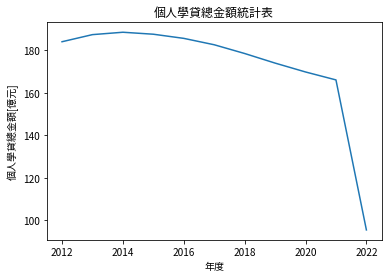

In [11]:
#@title
plt.ticklabel_format(style='plain')
plt.plot(dfByYear.index,dfByYear['個人學貸總金額[仟元]']/1000000)
plt.xlabel('年度')
plt.ylabel('個人學貸總金額[億元]')
plt.yticks
plt.title('個人學貸總金額統計表')
plt.show()

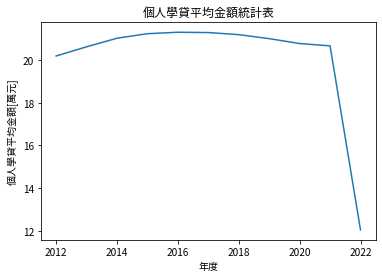

In [12]:
#@title
plt.ticklabel_format(style='plain')
plt.plot(dfByYear.index,dfByYear['個人學貸平均金額[仟元]']/10)
plt.xlabel('年度')
plt.ylabel('個人學貸平均金額[萬元]')
plt.yticks
plt.title('個人學貸平均金額統計表')
plt.show()